<a href="https://colab.research.google.com/github/RinlapasCha/Assignments-Tools/blob/main/PCA_preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Breast Cancer Wisconsin (Diagnostic) Data Set


id: ID number

diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean: mean of distances from center to points on the perimeter

texture_mean: standard deviation of gray-scale values

perimeter_mean: mean size of the core tumor

area_mean: area of the tumor

smoothness_mean: mean of local variation in radius lengths

compactness_mean: mean of perimeter^2 / area - 1.0

concavity_mean: mean of severity of concave portions of the contour

concave_points_mean: mean for number of concave portions of the contour
symmetry_mean

fractal_dimension_mean: mean for "coastline approximation" - 1

radius_se: standard error for the mean of distances from center to points on the perimeter

texture_se: standard error for standard deviation of gray-scale values
perimeter_se, area_se

smoothness_se: standard error for local variation in radius lengths

compactness_se: standard error for perimeter^2 / area - 1.0

concavity_se: standard error for severity of concave portions of the contour

concave_points_se: standard error for number of concave portions of the contour
symmetry_se

fractal_dimension_se: standard error for "coastline approximation" - 1

radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter

texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
perimeter_worst
area_worst

smoothness_worst: "worst" or largest mean value for local variation in radius lengths

compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

concavity_worst: "worst" or largest mean value for severity of concave portions of the contour

concave_points_worst: "worst" or largest mean value for number of concave portions of the contour
symmetry_worst
fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

Link Data : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Survey Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc


In [ ]:
 #from google.colab import drive
 #drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [ ]:
df = df.drop(['Unnamed: 32', 'id'],axis = 1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df.shape

(569, 31)

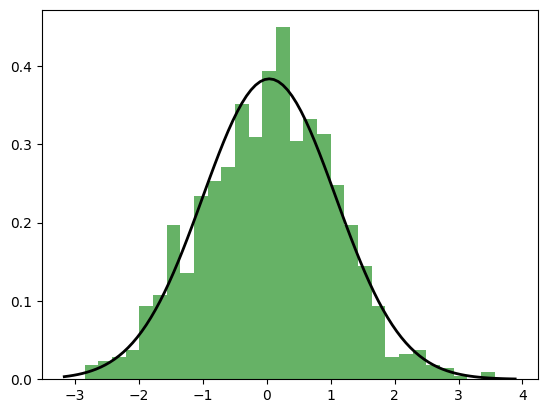

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# สร้างข้อมูลที่มีการกระจายตัวแบบ normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# พล็อต histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')  # เปลี่ยนสีเป็นสีเขียว (green)

# เพิ่มเส้นกราฟของ normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, loc=np.mean(data), scale=np.std(data))
plt.plot(x, p, 'k', linewidth=2)  # เปลี่ยนสีเป็นสีดำ (black)

# แสดงกราฟ
plt.show()



____

*31 features to determine whether the cancer cells in our data are benign or malignant. This data contains 2 types of cancers: 1. benign cancer (B) and 2. malignant cancer (M).*

____

#Classification Dimensionality Reduction

## Encoding labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M:1, B:0
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)



---


*standardization*


---



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#first fits the scaler to the data to learn the mean and standard deviation of each feature
# Fit on training set only.

scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
# Apply transform to both the training set and the test set.
##X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
#transforms the data based on these parameters.
scaled_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#pca = PCA(n_components=2)

In [ ]:
pca = PCA(.95)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=0.95)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape, x_pca.shape

((569, 31), (569, 11))

In [ ]:
pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2',
                      'principal component 3','principal component 4','principal component 5',
                      'principal component 6','principal component 7','principal component 8',
                      'principal component 9','principal component 10','principal component 11'])
pca_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11
0,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117,2.194974,-0.315737,-0.156946,-0.889455,0.193289
1,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019273,-0.099645,0.385282,-0.711683,1.049263,1.310276
2,5.892492,-1.005579,-0.487149,-0.942486,-0.191711,0.541332,-0.660969,0.058983,0.024004,0.456603,-0.142171
3,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062748,1.380734,1.150379,-1.405498,-1.123232,-0.176077
4,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428,-1.073155,0.717646,-0.263770,0.354929,0.551089
...,...,...,...,...,...,...,...,...,...,...,...
564,6.593983,-3.454947,2.570876,-1.152905,-0.129841,-2.377277,-0.586578,-0.065769,0.987906,0.256753,0.027679
565,4.024833,-3.556006,2.047373,2.568539,-0.434088,-0.243029,-0.670490,-1.121366,-0.104973,-0.128847,0.331092
566,1.530077,-1.958871,0.465718,2.104481,1.820113,-0.546015,-0.317641,0.460620,0.394043,0.495904,-0.004177
567,10.405008,1.849078,-1.779328,2.163463,0.201609,0.591631,0.461155,-0.552565,-0.542471,-0.004040,-1.403878


In [ ]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   principal component 1   569 non-null    float64
 1   principal component 2   569 non-null    float64
 2   principal component 3   569 non-null    float64
 3   principal component 4   569 non-null    float64
 4   principal component 5   569 non-null    float64
 5   principal component 6   569 non-null    float64
 6   principal component 7   569 non-null    float64
 7   principal component 8   569 non-null    float64
 8   principal component 9   569 non-null    float64
 9   principal component 10  569 non-null    float64
 10  principal component 11  569 non-null    float64
dtypes: float64(11)
memory usage: 49.0 KB


In [ ]:
import numpy

explained_variance = np.var(pca_df, axis=0)
explained_variance_ratio = explained_variance / numpy.sum(explained_variance)

In [ ]:
explained_variance_ratio

principal component 1     0.470225
principal component 2     0.193470
principal component 3     0.096183
principal component 4     0.067517
principal component 5     0.056053
principal component 6     0.040797
principal component 7     0.023134
principal component 8     0.016381
principal component 9     0.014085
principal component 10    0.011855
principal component 11    0.010300
dtype: float64

##Data split

In [ ]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(pca_df.iloc[:,0:], df['diagnosis'], test_size = 0.3, random_state = 42)

In [ ]:
X_train_PCA.shape, y_train_PCA.shape, X_test_PCA.shape, y_test_PCA.shape

((398, 11), (398,), (171, 11), (171,))

In [ ]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA

(     principal component 1  principal component 2  principal component 3  \
 149              -3.120456              -2.257719              -0.412001   
 124              -2.316094              -0.729194               0.325832   
 421               1.732106               2.443614               1.370754   
 195              -2.907740              -0.989795              -0.349004   
 545              -2.033886              -1.131687               0.492454   
 ..                     ...                    ...                    ...   
 71               -0.590093               7.456615               3.824572   
 106              -0.911921               1.819743              -0.560820   
 270              -4.532257              -3.227072              -0.158078   
 435               0.942518               0.330933              -2.805034   
 102              -3.509715              -1.468525              -0.120968   
 
      principal component 4  principal component 5  principal component 6 

Fit PCA on training set. Note: you are fitting PCA on the training set only



In [ ]:
#pca.fit(X_train)

Apply the mapping (transform) to both the training set and the test set.

In [ ]:
X_train_PCA = pca.fit_transform(X_train_PCA)

# Transform testing data using the same PCA model
X_test_PCA = pca.transform(X_test_PCA)

#Machine Learning Algorithms

## `1. Logistic Regression`

###Step 1: Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

###Step 2: Make an instance of the Model

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

###Step 3: Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [ ]:
PCA_model_logis = logisticRegr.fit(X_train_PCA, y_train_PCA)

###Step 4: Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [ ]:
# Predictions
PCA_y_pred_logis = logisticRegr.predict(X_test_PCA)

In [ ]:
PCA_y_pred_logis

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# สมมติว่าคุณมีโมเดล logistic regression ชื่อว่า logisticRegr
# และคุณได้ทำการทำนายด้วยข้อมูล PCA แล้วเก็บผลลัพธ์ไว้ในตัวแปร PCA_y_pred_logis

# ใช้ inverse_transform เพื่อทำการ decode
decoded_y_pred = le.inverse_transform(PCA_y_pred_logis)

# ผลลัพธ์คือค่าข้อมูลที่ถูก decode กลับมาจากการทำนาย PCA_y_pred_logis
print(decoded_y_pred)


['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B']


###Step 5: Measuring Model Performance
accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [ ]:
# ประเมินความสามารถในการจำแนกคลาสของโมเดล
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import fbeta_score


PCA_accuracy_logis = accuracy_score(y_test_PCA, PCA_y_pred_logis)
PCA_roc_auc_logis = roc_auc_score(y_test_PCA, PCA_y_pred_logis)
PCA_recall_logis = recall_score(y_test_PCA, PCA_y_pred_logis)
PCA_report_logis = classification_report(y_test_PCA, PCA_y_pred_logis)
PCA_f1_logis = fbeta_score(y_test_PCA, PCA_y_pred_logis, beta=1)
PCA_f2_logis = fbeta_score(y_test_PCA, PCA_y_pred_logis, beta=2)

print("F2 Score:", PCA_f2_logis)
print("F1 Score:", PCA_f1_logis)
print("Recall Score:", PCA_recall_logis)
print("Accuracy:", PCA_accuracy_logis)
print("ROC AUC:", PCA_roc_auc_logis)
print("Classification Report:\n", PCA_report_logis)

F2 Score: 0.9872611464968152
F1 Score: 0.9919999999999999
Recall Score: 0.9841269841269841
Accuracy: 0.9941520467836257
ROC AUC: 0.9920634920634921
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



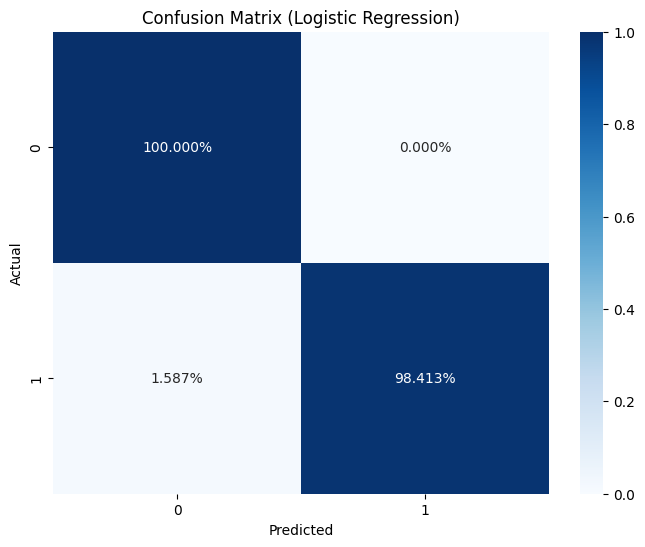

In [ ]:
from sklearn.metrics import confusion_matrix

# คำนวณ Confusion Matrix
PCA_cm_logis = confusion_matrix(y_test_PCA, PCA_y_pred_logis)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_logis / PCA_cm_logis.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

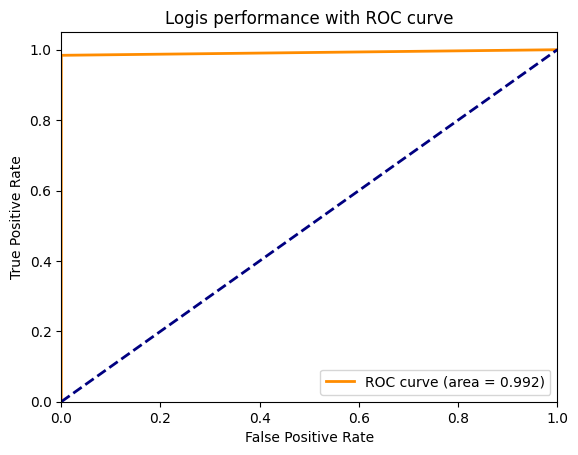

In [ ]:
# Plot ROC Curve
PCA_fpr_logis, PCA_tpr_logis, thresholds_PCA = roc_curve(y_test_PCA, PCA_y_pred_logis)
PCA_roc_auc_logis = auc(PCA_fpr_logis, PCA_tpr_logis)

plt.figure()
lw = 2
plt.plot(PCA_fpr_logis, PCA_tpr_logis, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % PCA_roc_auc_logis)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logis performance with ROC curve')
plt.legend(loc="lower right")
plt.show()

## `2. SVC`

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# instantiate classifier with linear kernel and C=10
PCA_linear_svc = SVC(kernel='linear', C=10)


# fit classifier to training set
PCA_model_svc = PCA_linear_svc.fit(X_train_PCA, y_train_PCA)


# make predictions on test set
PCA_y_pred_SVC = PCA_model_svc.predict(X_test_PCA)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=10 : {0:0.10f}'. format(accuracy_score(y_test_PCA, PCA_y_pred_SVC)))

Model accuracy score with linear kernel and C=10 : 0.9941520468


In [ ]:
# ประเมินความสามารถในการจำแนกคลาสของโมเดล
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import fbeta_score


PCA_accuracy_SVC = accuracy_score(y_test_PCA, PCA_y_pred_SVC)
PCA_recall_SVC = recall_score(y_test_PCA, PCA_y_pred_SVC)
PCA_roc_auc_SVC = roc_auc_score(y_test_PCA, PCA_y_pred_SVC)
PCA_report_SVC = classification_report(y_test_PCA, PCA_y_pred_SVC)
PCA_f1_SVC = fbeta_score(y_test_PCA, PCA_y_pred_SVC, beta=1)
PCA_f2_SVC = fbeta_score(y_test_PCA, PCA_y_pred_SVC, beta=2)

print("F2 Score:", PCA_f2_SVC)
print("F1 Score:", PCA_f1_SVC)
print("Recall Score:", PCA_recall_SVC)
print("Accuracy:", PCA_accuracy_SVC)
print("ROC AUC:", PCA_roc_auc_SVC)
print("Classification Report:\n", PCA_report_SVC)

F2 Score: 0.9872611464968152
F1 Score: 0.9919999999999999
Recall Score: 0.9841269841269841
Accuracy: 0.9941520467836257
ROC AUC: 0.9920634920634921
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



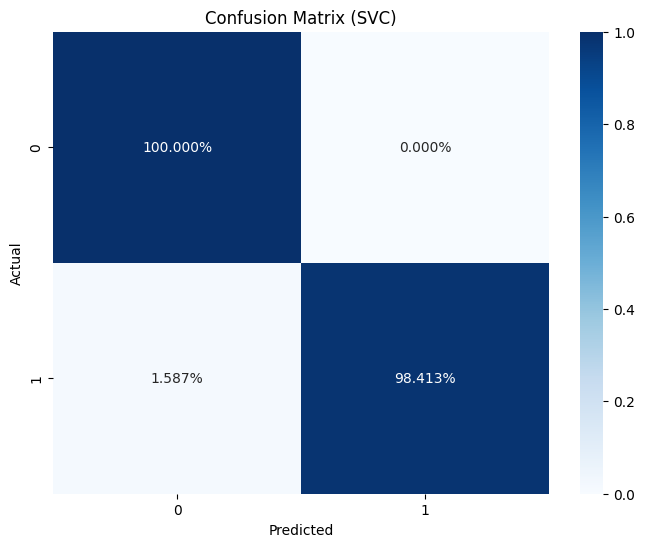

In [ ]:
from sklearn.metrics import confusion_matrix

# คำนวณ Confusion Matrix
PCA_cm_SVC = confusion_matrix(y_test_PCA, PCA_y_pred_SVC)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_SVC / PCA_cm_SVC.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix (SVC)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

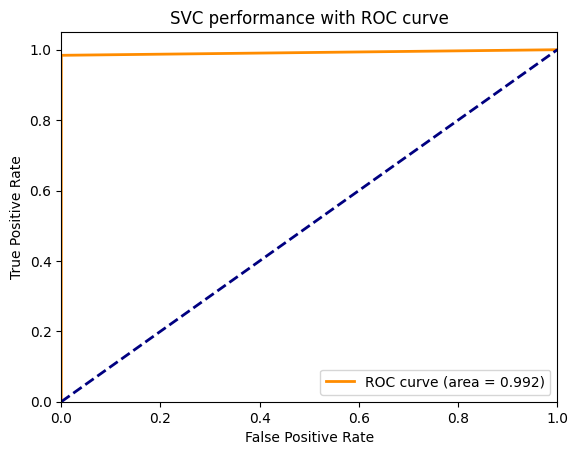

In [ ]:
# Plot ROC Curve
PCA_fpr_SVC, PCA_tpr_SVC, thresholds_PCA = roc_curve(y_test_PCA, PCA_y_pred_SVC)
PCA_roc_auc_SVC = auc(PCA_fpr_SVC, PCA_tpr_SVC)

plt.figure()
lw = 2
plt.plot(PCA_fpr_SVC, PCA_tpr_SVC, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % PCA_roc_auc_SVC)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC performance with ROC curve')
plt.legend(loc="lower right")
plt.show()

## `3. KNN Classification`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score

In [ ]:
# กำหนดพารามิเตอร์ของ KNN Classifier
PCA_knn_classifier = KNeighborsClassifier(n_neighbors=3)

# ฝึกโมเดลด้วยข้อมูล training
PCA_model_knn = PCA_knn_classifier.fit(X_train_PCA, y_train_PCA)

# ทำนายข้อมูล testing
PCA_y_pred_KNN = PCA_model_knn.predict(X_test_PCA)

# ประเมินประสิทธิภาพของโมเดล
PCA_accuracy_KNN = accuracy_score(y_test_PCA, PCA_y_pred_KNN)
PCA_recall_KNN = recall_score(y_test_PCA, PCA_y_pred_KNN)
PCA_roc_auc_KNN = roc_auc_score(y_test_PCA, PCA_y_pred_KNN)
PCA_report_KNN = classification_report(y_test_PCA, PCA_y_pred_KNN)
PCA_f1_score_KNN = fbeta_score(y_test_PCA, PCA_y_pred_KNN, beta=1)
PCA_f2_score_KNN = fbeta_score(y_test_PCA, PCA_y_pred_KNN, beta=2)

print("F2 Score:", PCA_f2_score_KNN)
print("F1 Score:", PCA_f1_score_KNN)
print("Recall Score:", PCA_recall_KNN)
print(f"Accuracy: {PCA_accuracy_KNN}")
print("ROC AUC:", PCA_roc_auc_KNN)
print("Classification Report:\n", PCA_report_KNN)

F2 Score: 0.9713375796178345
F1 Score: 0.976
Recall Score: 0.9682539682539683
Accuracy: 0.9824561403508771
ROC AUC: 0.9794973544973545
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



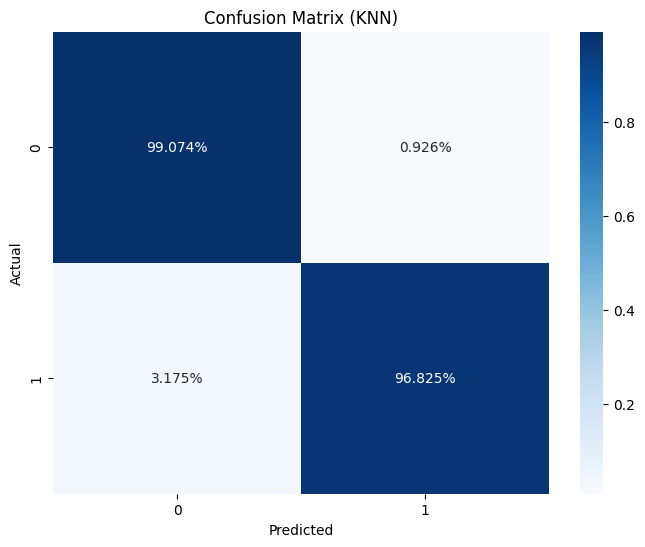

In [ ]:
from sklearn.metrics import confusion_matrix

# คำนวณ Confusion Matrix
PCA_cm_KNN = confusion_matrix(y_test_PCA, PCA_y_pred_KNN)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_KNN / PCA_cm_KNN.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

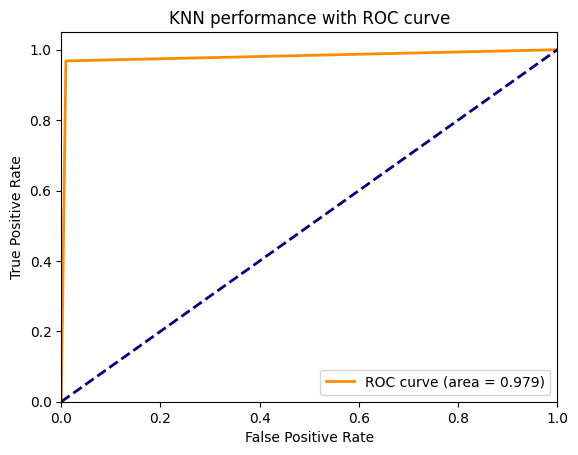

In [ ]:
# Plot ROC Curve
PCA_fpr_KNN, PCA_tpr_KNN, thresholds_PCA = roc_curve(y_test_PCA, PCA_y_pred_KNN)
PCA_roc_auc_KNN = auc(PCA_fpr_KNN, PCA_tpr_KNN)

plt.figure()
lw = 2
plt.plot(PCA_fpr_KNN, PCA_tpr_KNN, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % PCA_roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN performance with ROC curve')
plt.legend(loc="lower right")
plt.show()

## `4. XGBoost(Classifier)`

In [ ]:
import xgboost as xgb

# สร้างโมเดล XGBoost Classifier
PCA_XGBoost_Classifier = xgb.XGBClassifier()

# ฝึกโมเดลด้วยข้อมูลฝึกอบรม (X_train, y_train)
PCA_model_XGboost = PCA_XGBoost_Classifier.fit(X_train_PCA, y_train_PCA)

# ทำนายผลลัพธ์ด้วยข้อมูลทดสอบ (X_test)
PCA_y_pred_XGBoost = PCA_model_XGboost.predict(X_test_PCA)

In [ ]:
# ประเมินประสิทธิภาพของโมเดล
PCA_accuracy_XGBoost = accuracy_score(y_test_PCA, PCA_y_pred_XGBoost)
PCA_recall_XGBoost = recall_score(y_test_PCA, PCA_y_pred_XGBoost)
PCA_roc_auc_XGBoost = roc_auc_score(y_test_PCA, PCA_y_pred_XGBoost)
PCA_report_XGBoost = classification_report(y_test_PCA, PCA_y_pred_XGBoost)
PCA_f1_score_XGBoost = fbeta_score(y_test_PCA, PCA_y_pred_XGBoost, beta=1)
PCA_f2_score_XGBoost = fbeta_score(y_test_PCA, PCA_y_pred_XGBoost, beta=2)

print("F2 Score:", PCA_f2_score_XGBoost)
print("F1 Score:", PCA_f1_score_XGBoost)
print("Recall Score:", PCA_recall_XGBoost)
print(f"Accuracy: {PCA_accuracy_XGBoost}")
print("ROC AUC:", PCA_roc_auc_XGBoost)
print("Classification Report:\n", PCA_report_XGBoost)

F2 Score: 0.981012658227848
F1 Score: 0.9763779527559054
Recall Score: 0.9841269841269841
Accuracy: 0.9824561403508771
ROC AUC: 0.9828042328042329
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



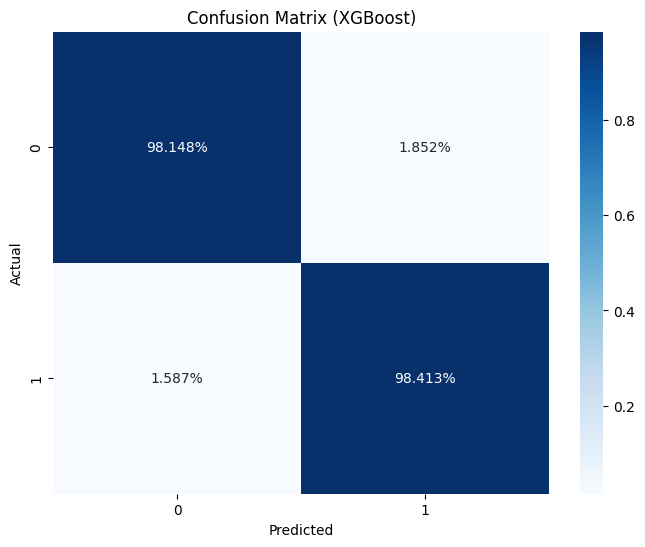

In [ ]:
# คำนวณ Confusion Matrix
PCA_cm_XGBoost = confusion_matrix(y_test_PCA, PCA_y_pred_XGBoost)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_XGBoost / PCA_cm_XGBoost.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

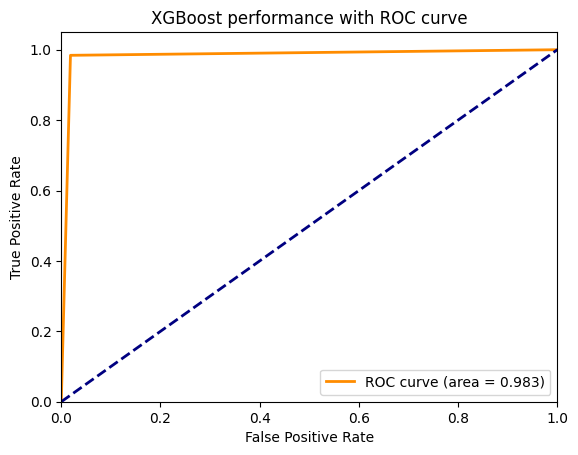

In [ ]:
# Plot ROC Curve
PCA_fpr_XGBoost, PCA_tpr_XGBoost, thresholds_PCA = roc_curve(y_test_PCA, PCA_y_pred_XGBoost)
PCA_roc_auc_XGBoost = auc(PCA_fpr_XGBoost, PCA_tpr_XGBoost)

plt.figure()
lw = 2
plt.plot(PCA_fpr_XGBoost, PCA_tpr_XGBoost, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % PCA_roc_auc_XGBoost)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost performance with ROC curve')
plt.legend(loc="lower right")
plt.show()

# สรุป MODEL

In [ ]:
# F2
model_f2_PCA = []
model_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'XGBClassifier']

f2_PCA_logis = fbeta_score(y_test_PCA, PCA_y_pred_logis, beta=2)
model_f2_PCA.append(f2_PCA_logis)

f2_PCA_SVC = fbeta_score(y_test_PCA, PCA_y_pred_SVC, beta=2)
model_f2_PCA.append(f2_PCA_SVC)

f2_PCA_KNN = fbeta_score(y_test_PCA, PCA_y_pred_KNN, beta=2)
model_f2_PCA.append(f2_PCA_KNN)

f2_PCA_XGB = fbeta_score(y_test_PCA, PCA_y_pred_XGBoost, beta=2)
model_f2_PCA.append(f2_PCA_XGB)

In [ ]:
# Recall
model_recall_PCA = []
model_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'XGBClassifier']

recall_PCA_logis = recall_score(y_test_PCA, PCA_y_pred_logis)
model_recall_PCA.append(recall_PCA_logis)

recall_PCA_SVC = recall_score(y_test_PCA, PCA_y_pred_SVC)
model_recall_PCA.append(recall_PCA_SVC)

recall_PCA_KNN = recall_score(y_test_PCA, PCA_y_pred_KNN)
model_recall_PCA.append(recall_PCA_KNN)

recall_PCA_XGB = recall_score(y_test_PCA, PCA_y_pred_XGBoost)
model_recall_PCA.append(recall_PCA_XGB)

In [ ]:
# Accuracy
model_accuracy_PCA = []
model_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'XGBClassifier']

accuracy_PCA_logis = accuracy_score(y_test_PCA, PCA_y_pred_logis)
model_accuracy_PCA.append(accuracy_PCA_logis)

accuracy_PCA_SVC = accuracy_score(y_test_PCA, PCA_y_pred_SVC)
model_accuracy_PCA.append(accuracy_PCA_SVC)

accuracy_PCA_KNN = accuracy_score(y_test_PCA, PCA_y_pred_KNN)
model_accuracy_PCA.append(accuracy_PCA_KNN)

accuracy_PCA_XGB = accuracy_score(y_test_PCA, PCA_y_pred_XGBoost)
model_accuracy_PCA.append(accuracy_PCA_XGB)

##ค่าModel

In [ ]:
model_f2_PCA

[0.9872611464968152, 0.9872611464968152, 0.9713375796178345, 0.981012658227848]

In [ ]:
model_recall_PCA

[0.9841269841269841,
 0.9841269841269841,
 0.9682539682539683,
 0.9841269841269841]

In [ ]:
model_accuracy_PCA

[0.9941520467836257,
 0.9941520467836257,
 0.9824561403508771,
 0.9824561403508771]

##Plot Graph

<ipython-input-59-d84635f1ffde>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=model_f2_PCA, ax=ax, palette=cols)


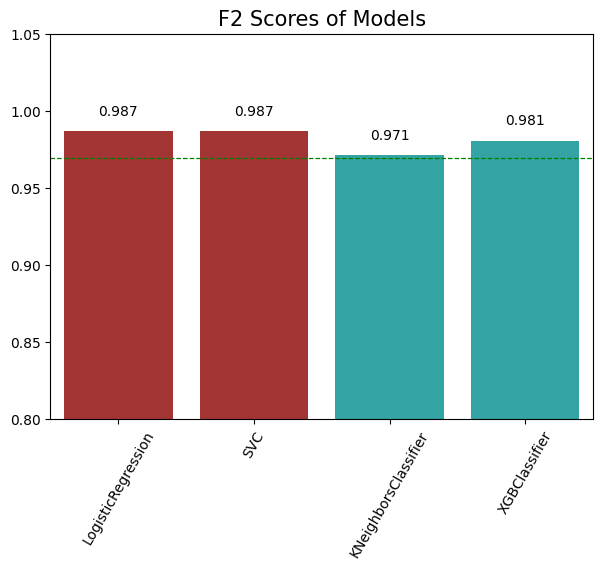

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# F2

fig, ax = plt.subplots(figsize=(7,5))
cols = ["#21B6B6" if i < (max(model_f2_PCA)) else "#B62121" for i in model_f2_PCA]
sns.barplot(x=model_name, y=model_f2_PCA, ax=ax, palette=cols)
plt.ylim(0.8, 1.05)
plt.title("F2 Scores of Models", fontsize=15)
plt.axhline(0.970, lw=0.9, ls="--", color="green")
plt.xticks(rotation=60)

for i in range(len(model_f2_PCA)):
    ax.text(i, model_f2_PCA[i] + 0.01, f"{model_f2_PCA[i]:.3f}", ha='center', color='black')
plt.show()

<ipython-input-60-1dade6bfb94b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=model_f2_PCA, ax=ax, palette=cols)


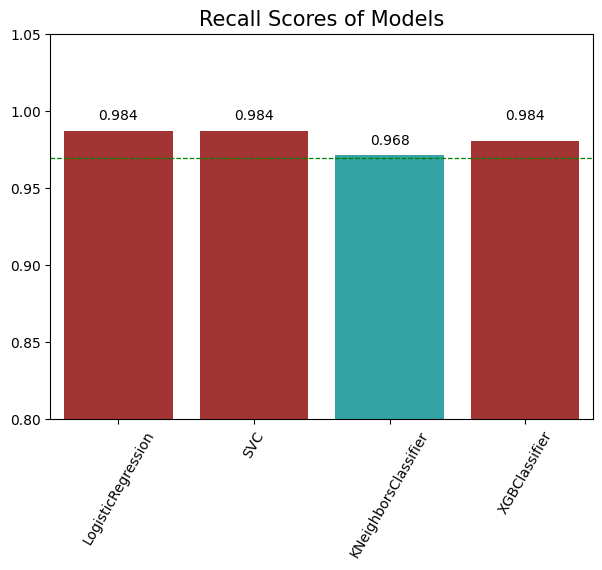

In [ ]:
# Recall

fig, ax = plt.subplots(figsize=(7,5))
cols = ["#21B6B6" if i < (max(model_recall_PCA)) else "#B62121" for i in model_recall_PCA]
sns.barplot(x=model_name, y=model_f2_PCA, ax=ax, palette=cols)
plt.ylim(0.8, 1.05)
plt.title("Recall Scores of Models", fontsize=15)
plt.axhline(0.970, lw=0.9, ls="--", color="green")
plt.xticks(rotation=60)

for i in range(len(model_recall_PCA)):
    ax.text(i, model_recall_PCA[i] + 0.01, f"{model_recall_PCA[i]:.3f}", ha='center', color='black')
plt.show()

<ipython-input-61-aec3009d1f9a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=model_accuracy_PCA, ax=ax, palette=cols)


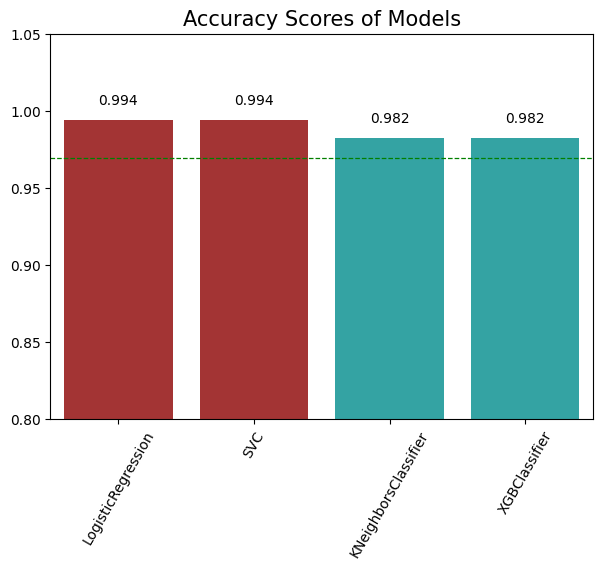

In [ ]:
#Accuracy

fig, ax = plt.subplots(figsize=(7,5))
cols = ["#21B6B6" if i < (max(model_accuracy_PCA)) else "#B62121" for i in model_accuracy_PCA]
sns.barplot(x=model_name, y=model_accuracy_PCA, ax=ax, palette=cols)
plt.ylim(0.8, 1.05)
plt.title("Accuracy Scores of Models", fontsize=15)
plt.axhline(0.970, lw=0.9, ls="--", color="green")
plt.xticks(rotation=60)

for i in range(len(model_accuracy_PCA)):
    ax.text(i, model_accuracy_PCA[i] + 0.01, f"{model_accuracy_PCA[i]:.3f}", ha='center', color='black')
plt.show()

#Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import get_scorer_names, make_scorer, fbeta_score

In [ ]:
CV_F2_PCA = []
scorer_f2 = make_scorer(fbeta_score,beta=2)

In [ ]:
CV_RECALL_PCA = []
scorer_recall = make_scorer(recall_score)

In [ ]:
CV_ACCURACY_PCA = []
scorer_accuracy = make_scorer(accuracy_score)

##Logistic Regression

In [ ]:
#f2
from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_logis_f2 = cross_val_score(PCA_model_logis, x_pca, y, cv=kf, scoring=scorer_f2)
CV_F2_PCA.append(scores_logis_f2.mean())

print(f'')
print(f'Scores for each fold: {scores_logis_f2}')
print(f'F2 Average score: {scores_logis_f2.mean():.3f}')


Scores for each fold: [1.         1.         0.98130841 1.         1.        ]
F2 Average score: 0.996


In [ ]:
#recall
from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_logis_recall = cross_val_score(PCA_model_logis, x_pca, y, cv=kf, scoring=scorer_recall)
CV_RECALL_PCA.append(scores_logis_recall.mean())

print(f'')
print(f'Scores for each fold: {scores_logis_recall}')
print(f'Recall Average score: {scores_logis_recall.mean():.3f}')


Scores for each fold: [1.         1.         0.97674419 1.         1.        ]
Recall Average score: 0.995


In [ ]:
#accuracy
from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_logis_accuracy = cross_val_score(PCA_model_logis, x_pca, y, cv=kf, scoring=scorer_accuracy)
CV_ACCURACY_PCA.append(scores_logis_accuracy.mean())

print(f'')
print(f'Scores for each fold: {scores_logis_accuracy}')
print(f'Accuracy Average score: {scores_logis_accuracy.mean():.3f}')


Scores for each fold: [1.         1.         0.99122807 1.         1.        ]
Accuracy Average score: 0.998




---



---



---



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Perform cross-validation
PCA_predicted_logis_CV = cross_val_predict(PCA_model_logis, x_pca, y, cv=kf)

# Forecast values after cross-validation
PCA_forecasted_logis_CV = PCA_model_logis.fit(x_pca, y).predict(x_pca)

# Calculate confusion matrix
PCA_conf_logis_CV = confusion_matrix(y, PCA_predicted_logis_CV)

# Calculate accuracy
PCA_acc_logis_CV = accuracy_score(y, PCA_predicted_logis_CV)

print("Confusion Matrix:")
print(PCA_conf_logis_CV)
print("Accuracy:", PCA_acc_logis_CV)

Confusion Matrix:
[[357   0]
 [  1 211]]
Accuracy: 0.9982425307557118


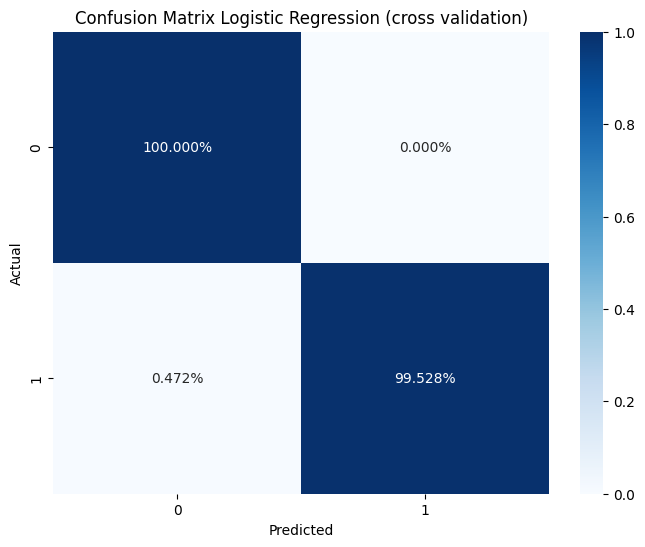

In [ ]:
# คำนวณ Confusion Matrix
PCA_cm_logis_CV = confusion_matrix(y, PCA_predicted_logis_CV)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_logis_CV / PCA_cm_logis_CV.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix Logistic Regression (cross validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##SVC

In [ ]:
#f2
from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_SVC_f2 = cross_val_score(PCA_model_svc, x_pca, y, cv=kf, scoring=scorer_f2)
CV_F2_PCA.append(scores_SVC_f2.mean())

print(f'')
print(f'Scores for each fold: {scores_SVC_f2}')
print(f'F2 Average score: {scores_SVC_f2.mean():.3f}')


Scores for each fold: [1. 1. 1. 1. 1.]
F2 Average score: 1.000


In [ ]:
#recall
from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_SVC_recall = cross_val_score(PCA_model_svc, x_pca, y, cv=kf, scoring=scorer_recall)
CV_RECALL_PCA.append(scores_SVC_recall.mean())

print(f'')
print(f'Scores for each fold: {scores_SVC_recall}')
print(f'Recall Average score: {scores_SVC_recall.mean():.3f}')


Scores for each fold: [1. 1. 1. 1. 1.]
Recall Average score: 1.000


In [ ]:
#accuracy
from sklearn.model_selection import KFold, cross_val_score
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_SVC_accuracy = cross_val_score(PCA_model_svc, x_pca, y, cv=kf, scoring=scorer_accuracy)
CV_ACCURACY_PCA.append(scores_SVC_accuracy.mean())

print(f'')
print(f'Scores for each fold: {scores_SVC_accuracy}')
print(f'Accuracy Average score: {scores_SVC_accuracy.mean():.3f}')


Scores for each fold: [1. 1. 1. 1. 1.]
Accuracy Average score: 1.000




---



---



---



In [ ]:
# Perform cross-validation
PCA_predicted_SVC_CV = cross_val_predict(PCA_model_svc, x_pca, y, cv=kf)

# Forecast values after cross-validation
PCA_forecasted_SVC_CV = PCA_model_svc.fit(x_pca, y).predict(x_pca)

# Calculate confusion matrix
PCA_conf_SVC_CV = confusion_matrix(y, PCA_predicted_SVC_CV)

# Calculate accuracy
PCA_acc_SVC_CV = accuracy_score(y, PCA_predicted_SVC_CV)

print("Confusion Matrix:")
print(PCA_conf_SVC_CV)
print("Accuracy:", PCA_acc_SVC_CV)

Confusion Matrix:
[[357   0]
 [  0 212]]
Accuracy: 1.0


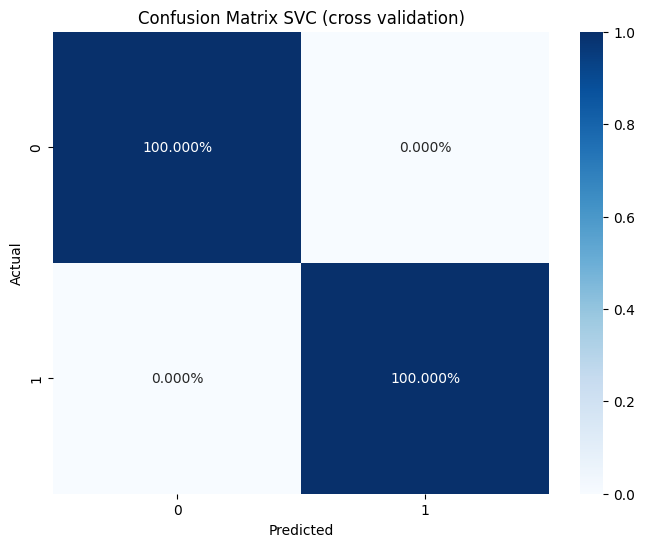

In [ ]:
# คำนวณ Confusion Matrix
PCA_cm_SVC_CV = confusion_matrix(y, PCA_predicted_SVC_CV)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_SVC_CV / PCA_cm_SVC_CV.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix SVC (cross validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##KNN

In [ ]:
#f2
from sklearn.model_selection import KFold, cross_val_score
k = 3
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_knn_f2 = cross_val_score(PCA_model_knn, x_pca, y, cv=kf, scoring=scorer_f2)
CV_F2_PCA.append(scores_knn_f2.mean())

print(f'')
print(f'Scores for each fold: {scores_knn_f2}')
print(f'F2 Average score: {scores_knn_f2.mean():.3f}')


Scores for each fold: [1.         0.98820059 0.97883598]
F2 Average score: 0.989


In [ ]:
#recall
from sklearn.model_selection import KFold, cross_val_score
k = 3
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_knn_recall = cross_val_score(PCA_model_knn, x_pca, y, cv=kf, scoring=scorer_recall)
CV_RECALL_PCA.append(scores_knn_recall.mean())

print(f'')
print(f'Scores for each fold: {scores_knn_recall}')
print(f'Recall Average score: {scores_knn_recall.mean():.3f}')


Scores for each fold: [1.         0.98529412 0.97368421]
Recall Average score: 0.986


In [ ]:
#accuracy
from sklearn.model_selection import KFold, cross_val_score
k = 3
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores_knn_accuracy = cross_val_score(PCA_model_knn, x_pca, y, cv=kf, scoring=scorer_accuracy)
CV_ACCURACY_PCA.append(scores_knn_accuracy.mean())

print(f'')
print(f'Scores for each fold: {scores_knn_accuracy}')
print(f'Accuracy Average score: {scores_knn_accuracy.mean():.3f}')


Scores for each fold: [1.         0.99473684 0.98941799]
Accuracy Average score: 0.995




---



---



---



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Perform cross-validation
PCA_predicted_knn_CV = cross_val_predict(PCA_model_knn, x_pca, y, cv=kf)

# Forecast values after cross-validation
PCA_forecasted_knn_CV = PCA_model_knn.fit(x_pca, y).predict(x_pca)

# Calculate confusion matrix
PCA_conf_knn_CV = confusion_matrix(y, PCA_predicted_knn_CV)

# Calculate accuracy
PCA_acc_knn_CV = accuracy_score(y, PCA_predicted_knn_CV)

print("Confusion Matrix:")
print(PCA_conf_knn_CV)
print("Accuracy:", PCA_acc_knn_CV)

Confusion Matrix:
[[357   0]
 [  3 209]]
Accuracy: 0.9947275922671354


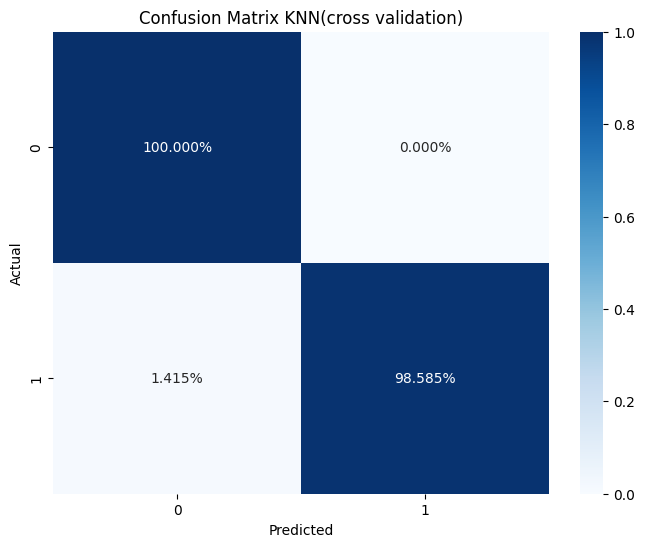

In [ ]:
from sklearn.metrics import confusion_matrix

# คำนวณ Confusion Matrix
PCA_cm_knn_CV = confusion_matrix(y, PCA_predicted_knn_CV)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_knn_CV / PCA_cm_knn_CV.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix KNN(cross validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##XGBoost

In [ ]:
#f2
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scorer_XGB_f2 = cross_val_score(PCA_model_XGboost, x_pca, y, cv=kf, scoring=scorer_f2, error_score='raise')
CV_F2_PCA.append(scorer_XGB_f2.mean())

print(f'')
print(f'Scores for each fold: {scorer_XGB_f2}')
print(f'F2 Average score: {scorer_XGB_f2.mean():.3f}')


Scores for each fold: [0.99537037 0.95108696 0.98130841 0.99537037 0.98253275]
F2 Average score: 0.981


In [ ]:
#recall
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scorer_XGB_recall = cross_val_score(PCA_model_XGboost, x_pca, y, cv=kf, scoring=scorer_recall, error_score='raise')
CV_RECALL_PCA.append(scorer_XGB_recall.mean())

print(f'')
print(f'Scores for each fold: {scorer_XGB_recall}')
print(f'Recall Average score: {scorer_XGB_recall.mean():.3f}')


Scores for each fold: [1.         0.94594595 0.97674419 1.         0.97826087]
Recall Average score: 0.980


In [ ]:
#accuracy
k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

scorer_XGB_accuracy = cross_val_score(PCA_model_XGboost, x_pca, y, cv=kf, scoring=scorer_accuracy, error_score='raise')
CV_ACCURACY_PCA.append(scorer_XGB_accuracy.mean())

print(f'')
print(f'Scores for each fold: {scorer_XGB_accuracy}')
print(f'Accuracy Average score: {scorer_XGB_accuracy.mean():.3f}')


Scores for each fold: [0.99122807 0.97368421 0.99122807 0.99122807 0.99115044]
Accuracy Average score: 0.988




---



---



---



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Perform cross-validation
PCA_predicted_XGB_CV = cross_val_predict(PCA_model_XGboost, x_pca, y, cv=kf)

# Forecast values after cross-validation
PCA_forecasted_knn_CV = PCA_model_XGboost.fit(x_pca, y).predict(x_pca)

# Calculate confusion matrix
PCA_conf_XGB_CV = confusion_matrix(y, PCA_predicted_XGB_CV)

# Calculate accuracy
PCA_acc_XGB_CV = accuracy_score(y, PCA_predicted_XGB_CV)

print("Confusion Matrix:")
print(PCA_conf_XGB_CV)
print("Accuracy:", PCA_acc_XGB_CV)

Confusion Matrix:
[[354   3]
 [  4 208]]
Accuracy: 0.9876977152899824


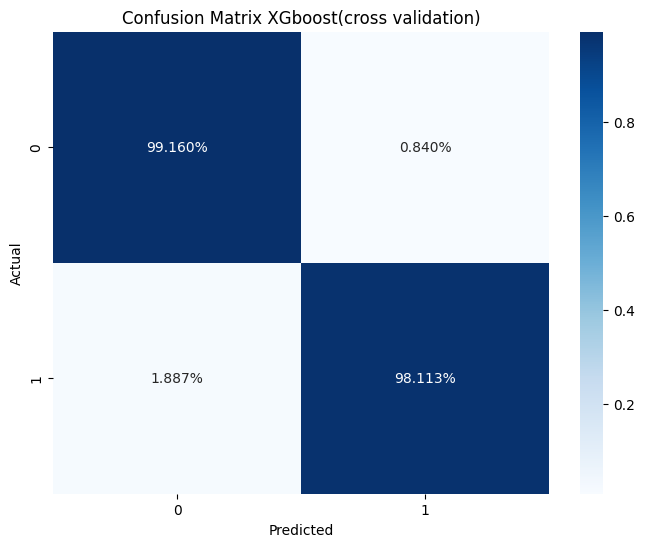

In [ ]:
from sklearn.metrics import confusion_matrix

# คำนวณ Confusion Matrix
PCA_cm_XGB_CV = confusion_matrix(y, PCA_predicted_XGB_CV)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(PCA_cm_XGB_CV / PCA_cm_XGB_CV.sum(axis=1)[:, np.newaxis], annot=True, fmt=".3%", cmap="Blues")
plt.title("Confusion Matrix XGboost(cross validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#สรุปโมเดลที่ผ่านการ CV

In [ ]:
CV_F2_PCA

[0.9962616822429906, 1.0, 0.9890121896021601, 0.9811337719138272]

In [ ]:
CV_RECALL_PCA

[0.9953488372093023, 1.0, 0.986326109391125, 0.980190200311535]

In [ ]:
CV_ACCURACY_PCA

[0.9982456140350877, 1.0, 0.9947182771744175, 0.9877037727061013]

##Plot Graph

<ipython-input-89-fce0a6eb6938>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=CV_F2_PCA, ax=ax, palette=cols)


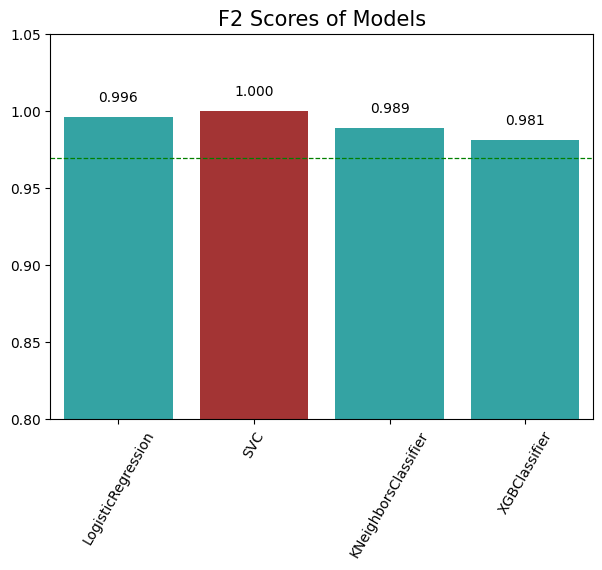

In [ ]:
#CV_F2_PCA = []
model_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'XGBClassifier']

fig, ax = plt.subplots(figsize=(7,5))
cols = ["#21B6B6" if i < (max(CV_F2_PCA)) else "#B62121" for i in CV_F2_PCA]
#cols = ["darkorange" if score < max(CV_PCA) else "brown" for score in CV_PCA]


sns.barplot(x=model_name, y=CV_F2_PCA, ax=ax, palette=cols)
plt.ylim(0.8, 1.05)
plt.title("F2 Scores of Models", fontsize=15)
plt.axhline(0.970, lw=0.9, ls="--", color="green")
plt.xticks(rotation=60)

for i in range(len(CV_F2_PCA)):
    ax.text(i, CV_F2_PCA[i] + 0.01, f"{CV_F2_PCA[i]:.3f}", ha='center', color='black')
plt.show()

<ipython-input-90-92200df7ab13>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=CV_RECALL_PCA, ax=ax, palette=cols)


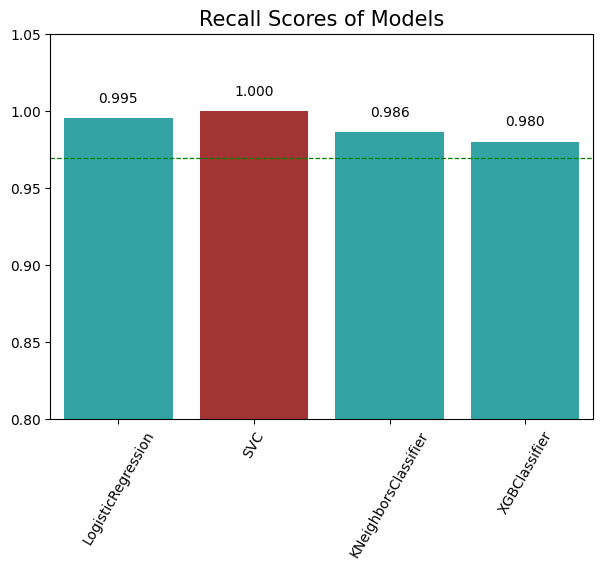

In [ ]:
#CV_RECALL_PCA = []
model_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'XGBClassifier']

fig, ax = plt.subplots(figsize=(7,5))
cols = ["#21B6B6" if i < (max(CV_RECALL_PCA)) else "#B62121" for i in CV_RECALL_PCA]


sns.barplot(x=model_name, y=CV_RECALL_PCA, ax=ax, palette=cols)
plt.ylim(0.8, 1.05)
plt.title("Recall Scores of Models", fontsize=15)
plt.axhline(0.970, lw=0.9, ls="--", color="green")
plt.xticks(rotation=60)

for i in range(len(CV_RECALL_PCA)):
    ax.text(i, CV_RECALL_PCA[i] + 0.01, f"{CV_RECALL_PCA[i]:.3f}", ha='center', color='black')
plt.show()

<ipython-input-91-7c82d81d9a4f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=CV_ACCURACY_PCA, ax=ax, palette=cols)


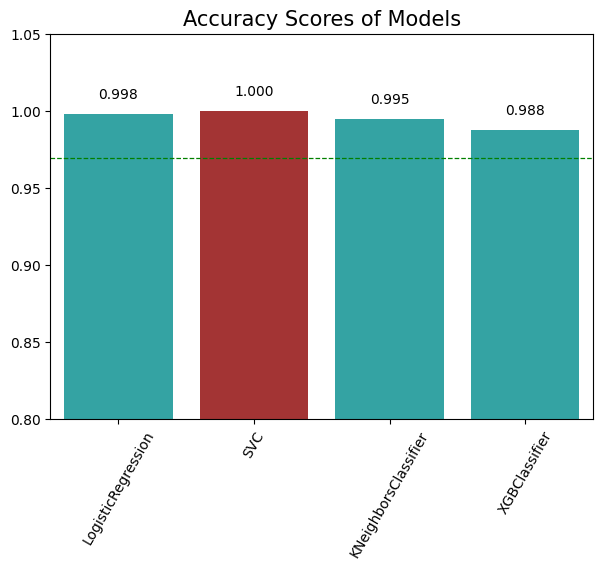

In [ ]:
#CV_ACCURACY_PCA = []
model_name = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'XGBClassifier']

fig, ax = plt.subplots(figsize=(7,5))
cols = ["#21B6B6" if i < (max(CV_ACCURACY_PCA)) else "#B62121" for i in CV_ACCURACY_PCA]
#cols = ["darkorange" if score < max(CV_PCA) else "brown" for score in CV_PCA]


sns.barplot(x=model_name, y=CV_ACCURACY_PCA, ax=ax, palette=cols)
plt.ylim(0.8, 1.05)
plt.title("Accuracy Scores of Models", fontsize=15)
plt.axhline(0.970, lw=0.9, ls="--", color="green")
plt.xticks(rotation=60)

for i in range(len(CV_ACCURACY_PCA)):
    ax.text(i, CV_ACCURACY_PCA[i] + 0.01, f"{CV_ACCURACY_PCA[i]:.3f}", ha='center', color='black')
plt.show()

# `Credit`

https://xgboost.readthedocs.io/en/latest/parameter.html

https://www.baeldung.com/cs/train-test-datasets-ratio

https://gist.github.com/alinaselega/a85a41b733c0eed1d5c607fad0cddc17

https://www.kaggle.com/code/palanjali007/xgbclassifier#Using-XGBClassifier

https://scikit-learn.org/stable/modules/cross_validation.html

https://www.kaggle.com/code/karltonkxb/dimensionality-reduction-techniques

https://medium.com/@avijit.bhattacharjee1996/implementing-k-fold-cross-validation-from-scratch-in-python-ae413b41c80d

https://www.kaggle.com/code/shivanirana63/breast-cancer-prediction-10-models-pca

[เริ่มต้นทำ Machine Learning แบบง่ายๆ (อธิบายพร้อม Code) (2)](https://parinkittipongdaja.medium.com/%E0%B9%80%E0%B8%A3%E0%B8%B4%E0%B9%88%E0%B8%A1%E0%B8%95%E0%B9%89%E0%B8%99%E0%B8%97%E0%B8%B3-machine-learning-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B9%86-%E0%B8%AD%E0%B8%98%E0%B8%B4%E0%B8%9A%E0%B8%B2%E0%B8%A2%E0%B8%9E%E0%B8%A3%E0%B9%89%E0%B8%AD%E0%B8%A1-code-2-bd370f7d74d1)

[Scale or Standardize or Normalize](https://medium.com/data-espresso/scale-or-standardize-or-normalize-ef905613f275)

[link text](https://www.kaggle.com/code/janiezj/breast-cancer-analysis-using-machine-learning/notebook)